# 1. Imports

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Dados

## 2.1. Import

In [8]:
root_path = os.path.abspath('..')
data_path = os.path.join(root_path, 'notebooks')
extra_medidas_path = os.path.join(root_path, 'extra', 'medidas_governamentais')

In [9]:
noticias_filename = 'noticias_en_classification.csv'
tweets_filename = 'tweets_en_classification.csv'
medidas_filename = 'medidas_governamentais.csv'

In [10]:
noticias_path = os.path.join(data_path, noticias_filename)
tweets_path = os.path.join(data_path, tweets_filename)
medidas_path = os.path.join(extra_medidas_path, medidas_filename)

In [11]:
noticias = pd.read_csv(noticias_path, index_col='Unnamed: 0')

In [12]:
tweets = pd.read_csv(tweets_path, index_col='Unnamed: 0').drop(columns='Unnamed: 0.1')

In [13]:
medidas = pd.read_csv(medidas_path)

## 2.2. Cleaning

### 2.2.1. NaNs

#### 2.2.1.1 Notícias

In [14]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37593 entries, 0 to 37592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      37593 non-null  object 
 1   titulo                    37593 non-null  object 
 2   descricao                 37241 non-null  object 
 3   source                    37593 non-null  object 
 4   titulo_clean              37592 non-null  object 
 5   titulo_en                 37592 non-null  object 
 6   classification            37593 non-null  object 
 7   score                     37593 non-null  float64
 8   descricao_clean           37221 non-null  object 
 9   descricao_en              37221 non-null  object 
 10  descricao_classification  37593 non-null  object 
 11  descricao_score           37593 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


In [15]:
index_descricao_null = noticias[noticias.descricao.isnull().values].index

In [16]:
noticias[noticias.descricao.isnull().values].source.value_counts()

publico    352
Name: source, dtype: int64

In [17]:
index_titulo_clean_null = noticias[noticias.titulo_clean.isnull().values].index

In [18]:
noticias[noticias.titulo_clean.isnull().values].source.value_counts()

observador    1
Name: source, dtype: int64

In [19]:
index_descricao_clean_null = noticias[noticias.descricao_clean.isnull().values].index

In [20]:
noticias[noticias.descricao_clean.isnull().values].source.value_counts()

publico    372
Name: source, dtype: int64

In [21]:
noticias.titulo[index_titulo_clean_null].values

array([' '], dtype=object)

In [22]:
# lets get the descricao_clean that have descricao not null
index_descricao_clean_null_weird = set(index_descricao_clean_null) - set(index_descricao_null)

In [23]:
noticias.descricao[index_descricao_clean_null_weird].values

array([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)

***
Time to remove these NaNs classifications...
***

In [24]:
noticias.loc[index_titulo_clean_null, 'classification'] = np.nan

In [25]:
noticias.loc[index_titulo_clean_null, 'score'] = np.nan

In [26]:
noticias.loc[index_descricao_clean_null, 'descricao_classification'] = np.nan

In [27]:
noticias.loc[index_descricao_clean_null, 'descricao_score'] = np.nan

***
Now lets get rid of them
***

In [28]:
noticias = noticias.dropna()

In [29]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37220 entries, 0 to 37592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      37220 non-null  object 
 1   titulo                    37220 non-null  object 
 2   descricao                 37220 non-null  object 
 3   source                    37220 non-null  object 
 4   titulo_clean              37220 non-null  object 
 5   titulo_en                 37220 non-null  object 
 6   classification            37220 non-null  object 
 7   score                     37220 non-null  float64
 8   descricao_clean           37220 non-null  object 
 9   descricao_en              37220 non-null  object 
 10  descricao_classification  37220 non-null  object 
 11  descricao_score           37220 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


#### 2.2.1.2. Tweets

In [30]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   hashtag         4830 non-null   object 
 5   geo             1 non-null      object 
 6   text_clean      21140 non-null  object 
 7   text_en         21140 non-null  object 
 8   classification  21140 non-null  object 
 9   score           21140 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.8+ MB


In [31]:
tweets = tweets.drop(columns=['hashtag', 'geo'])

In [32]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   text_clean      21140 non-null  object 
 5   text_en         21140 non-null  object 
 6   classification  21140 non-null  object 
 7   score           21140 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.5+ MB


### 2.2.2. Converting classification to -1/1

In [33]:
map_dict = {'NEGATIVE': -1, 'POSITIVE': 1}

In [34]:
noticias.loc[:, 'classification'] = noticias.classification.map(map_dict)
noticias.loc[:, 'descricao_classification'] = noticias.descricao_classification.map(map_dict)
tweets.loc[:, 'classification'] = tweets.classification.map(map_dict)

In [35]:
noticias.classification.value_counts()

-1    27129
 1    10091
Name: classification, dtype: int64

In [36]:
noticias.descricao_classification.value_counts()

-1    28238
 1     8982
Name: descricao_classification, dtype: int64

In [37]:
tweets.classification.value_counts()

-1    15439
 1     5701
Name: classification, dtype: int64

### 2.2.3. Converting dates to datetime objects

In [38]:
noticias['data'] = pd.to_datetime(noticias['data'], errors= "coerce").dt.tz_localize(None)

In [39]:
tweets['date'] = pd.to_datetime(tweets['date'], errors= "coerce").dt.tz_localize(None)

In [40]:
medidas['data'] = pd.to_datetime(medidas['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)

In [41]:
noticias.data.dtypes # same as datetime64[ns]

dtype('<M8[ns]')

In [42]:
tweets.date.dtypes # same as datetime[ns]

dtype('<M8[ns]')

In [43]:
medidas.data.dtypes # same as datetime[ns]

dtype('<M8[ns]')

# 3. Análise

In [44]:
medidas.groupby(pd.Grouper(key='data', freq='MS')).count()

,local,tipo,desc
data,,,
2020-03-01,32,32,32
2020-04-01,18,18,18
2020-05-01,40,40,40
2020-06-01,17,17,17
2020-07-01,13,13,13


In [45]:
tweets['weighted_classification'] = tweets.classification * tweets.score

In [46]:
noticias['weighted_classification'] = noticias.classification * noticias.score

In [47]:
noticias['weighted_desc_classification'] = noticias.descricao_classification * noticias.descricao_score

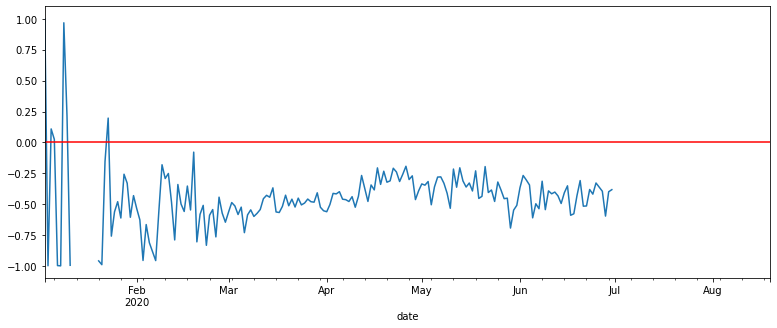

In [48]:
tweets.groupby(pd.Grouper(key='date', freq='D'))['weighted_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

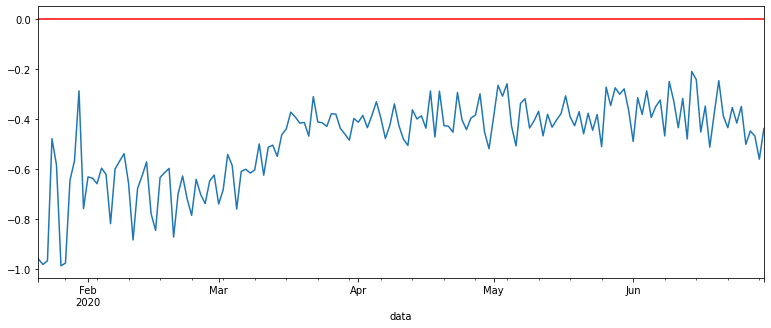

In [49]:
noticias.groupby(pd.Grouper(key='data', freq='D'))['weighted_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

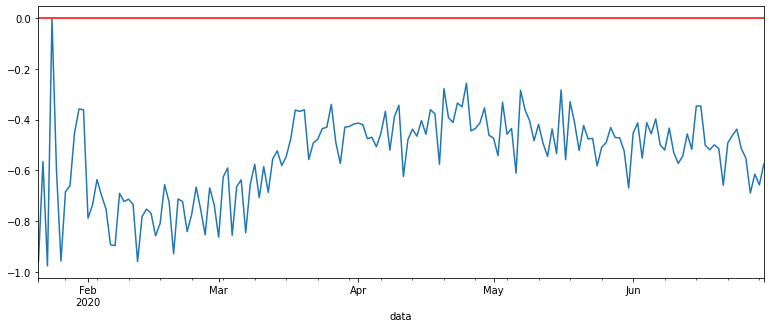

In [50]:
noticias.groupby(pd.Grouper(key='data', freq='D'))['weighted_desc_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

In [51]:
def plot_sentiment(df,
                   date_name,
                   classification_name,
                   freq,
                   agg_name='mean',
                   fig_size=(13, 5),
                   plot_type='line',
                   plot_zero_line=False):
    df.groupby(pd.Grouper(key=date_name, freq=freq))[classification_name]\
        .agg(agg_name)\
        .plot(figsize=fig_size, kind=plot_type)
    if plot_zero_line:
        plt.axhline(y=0.0, color='r', linestyle='-')

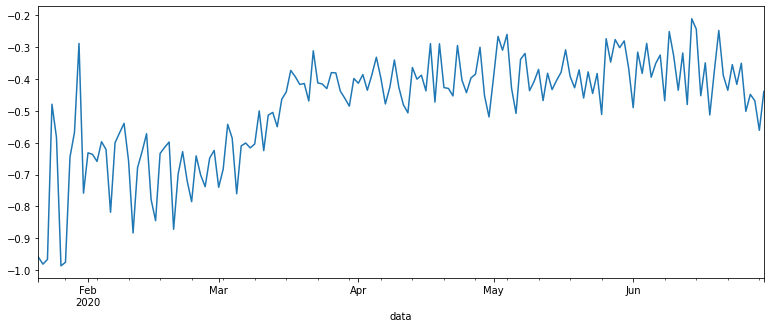

In [52]:
plot_sentiment(noticias, 'data', 'weighted_classification', 'D',)

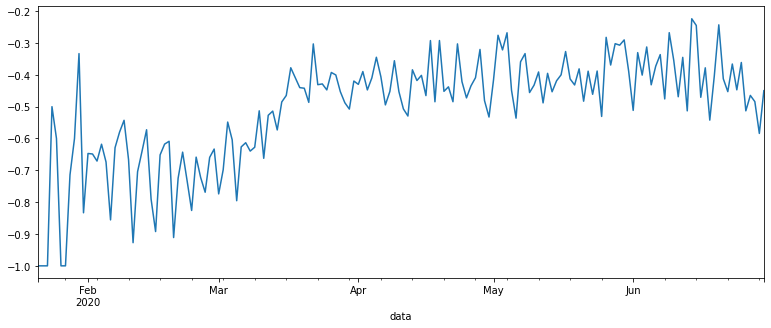

In [53]:
plot_sentiment(noticias, 'data', 'classification', 'D',)

In [54]:
medidas.data.dt.date.unique()[0]

datetime.date(2020, 3, 8)

In [55]:
def get_adjacent_dates_idx(df_date_values, date_to_find):
    if date_to_find in df_date_values:
        idx = np.where(df_date_values == date_to_find)[0][0]
        idx_before = idx - 1
        idx_after = idx + 1
    else:
        idx_before = np.where(df_date_values < date_to_find)[0][-1]
        idx_after = idx_before + 1
    return (idx_before, idx_after)

In [56]:
def group_df(df, key_name, freq_name, clf_name, agg_name, reset_index=True, dropna=True):
    new_df = df.groupby(pd.Grouper(key=key_name, freq=freq_name))[clf_name].agg(agg_name)
    if reset_index:
        new_df = new_df.reset_index()
    if dropna:
        new_df = new_df.dropna()
    return new_df

In [57]:
def get_unique_dates(df, date_name):
    return df[date_name].dt.date.unique()

In [58]:
df_temp = tweets.groupby(pd.Grouper(key='date', freq='D'))['weighted_classification'].agg('mean').reset_index().dropna()
medidas_dates = medidas.data.dt.date.unique()
tweet_dates = df_temp.date.dt.date.values

In [59]:
df_temp = group_df(tweets, 'date', 'D', 'weighted_classification', 'mean')
medidas_dates = get_unique_dates(medidas, 'data')
tweets_dates = get_unique_dates(df_temp, 'date')

In [60]:
def get_sentiment_changes(df_data, df_events, df_data_key, df_events_key, clf_name):
    events_dates = get_unique_dates(df_events, df_events_key)
    data_dates = get_unique_dates(df_data, df_data_key)
    ans_dict = dict()
    for date in events_dates:
        before_idx, after_idx = get_adjacent_dates_idx(data_dates, date)
        before_date = data_dates[before_idx]
        after_date = data_dates[after_idx]
        sentiment_before = df_data[data_dates == before_date][clf_name].values[0]
        sentiment_after = df_data[data_dates == after_date][clf_name].values[0]
        if date in data_dates:
            sentiment_middle = df_data[data_dates == date][clf_name].values
        else:
            sentiment_middle = [np.nan]
        ans_dict[date] = {'before_date': before_date,
                          'before_sentiment': sentiment_before,
                          'middle_date': date,
                          'middle_sentiment': sentiment_middle[0],
                          'after_date': after_date,
                          'after_sentiment': sentiment_after}
    return ans_dict

In [61]:
change_dict = get_sentiment_changes(df_temp, medidas, 'date', 'data', 'weighted_classification')

In [62]:
for date, value in change_dict.items():
    print(date, ':', round(value['before_sentiment'], 2), '->', round(value['middle_sentiment'], 2), '->', round(value['after_sentiment'], 2))

2020-03-08 : -0.59 -> -0.54 -> -0.6
2020-03-12 : -0.54 -> -0.45 -> -0.43
2020-03-13 : -0.45 -> -0.43 -> -0.44
2020-03-14 : -0.43 -> -0.44 -> -0.37
2020-03-15 : -0.44 -> -0.37 -> -0.56
2020-03-16 : -0.37 -> -0.56 -> -0.57
2020-03-17 : -0.56 -> -0.57 -> -0.52
2020-03-18 : -0.57 -> -0.52 -> -0.43
2020-03-19 : -0.52 -> -0.43 -> -0.51
2020-03-22 : -0.46 -> -0.52 -> -0.45
2020-03-23 : -0.52 -> -0.45 -> -0.5
2020-03-26 : -0.49 -> -0.46 -> -0.48
2020-04-02 : -0.56 -> -0.5 -> -0.41
2020-04-03 : -0.5 -> -0.41 -> -0.42
2020-04-09 : -0.48 -> -0.44 -> -0.52
2020-04-17 : -0.38 -> -0.21 -> -0.34
2020-04-30 : -0.46 -> -0.39 -> -0.34
2020-05-03 : -0.35 -> -0.32 -> -0.5
2020-05-04 : -0.32 -> -0.5 -> -0.36
2020-05-07 : -0.28 -> -0.28 -> -0.33
2020-05-15 : -0.31 -> -0.36 -> -0.33
2020-05-18 : -0.39 -> -0.23 -> -0.45
2020-05-30 : -0.69 -> -0.55 -> -0.51
2020-06-01 : -0.51 -> -0.37 -> -0.27
2020-06-09 : -0.31 -> -0.54 -> -0.39
2020-06-15 : -0.49 -> -0.41 -> -0.35
2020-06-23 : -0.51 -> -0.38 -> -0.42
2020-07

***
TODO
- generalizar a mudança para uma média de dias: _FEITO_
- visualizar estas mudanças
- fazer para tweets, títulos e descrições
***

In [63]:
def get_adjacent_date_window_idx(df_date_values, date_to_find, window_size=1):
    window = range(1, window_size+1)
    idx_before = list()
    idx_after = list()
    for pos in window:
        if date_to_find in df_date_values:
            idx = np.where(df_date_values == date_to_find)[0][0]
            idx_before.append(idx - pos)
            idx_after.append(idx + pos)
        else:
            idx_before.append(np.where(df_date_values < date_to_find)[0][-pos])
            idx_after.append(idx_before + pos)
    return (idx_before, idx_after)

In [65]:
df = pd.DataFrame.from_dict(change_dict, orient='index')

In [66]:
df['before_date'] = pd.to_datetime(df['before_date'], errors= "coerce").dt.tz_localize(None)

In [67]:
print(df.before_sentiment.min())
print(df.before_sentiment.max())
print(df.after_sentiment.min())
print(df.after_sentiment.max())
print(df.after_sentiment.max() - df.before_sentiment.min())

-0.6922331161615325
-0.28006157937802767
-0.5981807456047403
0.9940541982650756
1.686287314426608


In [68]:
df['change'] = df.after_sentiment - df.before_sentiment

In [69]:
print(df.change.max())
print(df.change.min())

1.3757164729268927
-0.19935438729969235


In [70]:
y_ticks = list(np.arange(-0.75, -0.25, (-0.25-(-0.75))/9))
print(y_ticks)

[-0.75, -0.6944444444444444, -0.6388888888888888, -0.5833333333333333, -0.5277777777777777, -0.4722222222222221, -0.4166666666666665, -0.36111111111111094, -0.30555555555555536]


In [71]:
# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)

In [72]:
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            print(dates_middle[i])
            print(medidas[medidas['data'] == dates_middle[i]]['desc'].values)
            print()

2020/03/16
['Limites à circulação da fronteira com Espanha, limitando-a à circulação de trabalhadores transfronteiriços e mercadorias'
 'Fecho de todos os estabelecimentos de ensino'
 'Reposto temporariamente o controlo documental na fronteira com Espanha']

2020/05/03
['Decretado Estado de Calamidade']

2020/05/30
['Celebrações comunitárias de cerimónias religiosas com regras a definir entre DGS e confissões religiosas'
 'Reabertura das competições oficiais da Primeira Liga de futebol e da Taça de Portugal']

2020/06/01
['Teletrabalho parcial, com horários desfasados ou equipas em espelho'
 'Abertura de lojas de cidadão'
 'Abertura de lojas com área superior a quatrocentos metros quadrados ou inseridas em centros comerciais'
 'Abertura de creches, pré-escolar e ATLs'
 'Abertura de cinemas, teatros, auditórios e salas de espectáculos, com lugares marcados, lotação reduzida e distanciamento físico']



In [165]:
import textwrap

In [167]:
textwrap.wrap(test_str, width=50)

['era uma vez um cavalo que vivia num lindo',
 'carrossel feito de chocolate com sabor a morango',
 'mas cheiro a limão DU DU HAST DU HAS MICH e ainda',
 'mais coisas uma vez que era um chocolate raro e',
 'extraordinário como a porra']

In [119]:
def wrap_text(text_block, wrap_len):
    new_textlines = list()
    for textline in ['- ' + desc for desc in text_block]:
        if len(textline) < wrap_len:
            new_textlines.append(textline)
        else:
            temptext_list = textline.split(' ')
            temptext_len = np.array([len(word)+1 for word in temptext_list])
            temptext_cumulative = np.cumsum(temptext_len)
            idx = np.where(temptext_cumulative > wrap_len)[0][0]-1
            new_textlines.append(' '.join(temptext_list[:idx]))
            new_textlines.append('  ' + ' '.join(temptext_list[idx:]))
    return new_textlines

In [121]:
wrap_text(medidas[medidas['data'] == dates_middle[2]]['desc'].values, 50)

[  2  10  19  22  30  38  40  49  52  58  61  66  72  74  81  83  90  95
  98 110 116 119 129 133 135 143 146 157 166]
[ 2 14 26 29 41 43 55 59 66 69 78]
[ 2 12 15 23 26 35 44 48 53 56 61 69]
[ 2 12 15 23 26 29 32 38 42 47 50 55 63]
[ 2 15 18 35 38 50 52 60 64 70 73 81 84 90]


['- Decretado o Estado de Alerta',
 '- Governo Regional da Madeira ordenou a',
 '  cessação de todos os voos entre a região e países onde há transmissão ativa de Covid-19, com a exceção do território nacional',
 '- Interditado desembarque de passageiros',
 '  e tripulações dos navios de cruzeiro',
 '- Proibição de eventos em recintos cobertos',
 '  com mais de 1000 pessoas',
 '- Proibição de eventos em ao ar livre com mais',
 '  de 5000 pessoas',
 '- Encerramento de estabelecimentos de',
 '  restauração e bebidas com salas ou espaços de dança']

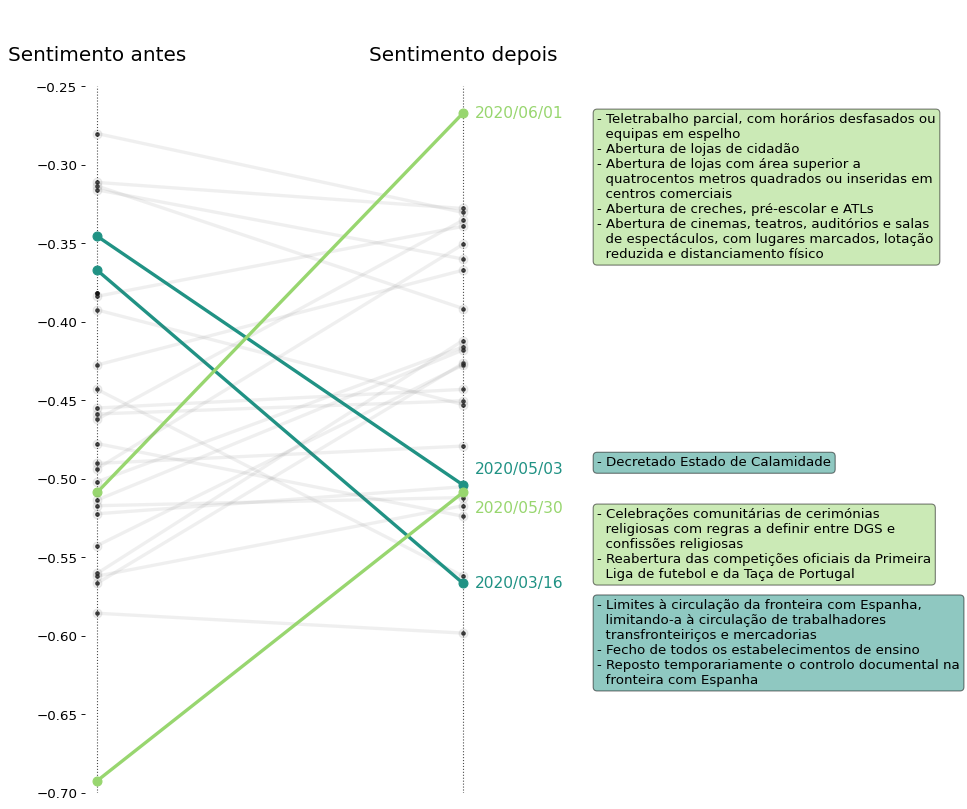

In [194]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25]

axis_left_pos = 1
axis_right_pos = 4

wrap_len = 50

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p2[0]], 
                      [p1[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(12,13), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.25, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.25, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            newline([axis_left_pos, p[0]], [axis_right_pos, p[1]])
            
            medidas_text = [textwrap.wrap('- '+sentence, wrap_len) for sentence in medidas[medidas['data'] == dates_middle[i]]['desc'].values]
            medidas_text = [line for sentence in medidas_text for line in sentence]
            medidas_text = [sentence if sentence.startswith('-') else '  ' + sentence for sentence in medidas_text]
            box_text = '\n'.join(medidas_text)
            
            if(p[1]-p[0] > 0):
                if(dates_middle[i] == '2020/05/30'):
                    ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]-0.01, box_text, fontsize=12, verticalalignment='top', bbox=props, wrap=True)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
            else:
                if(dates_middle[i] == '2020/05/03'):
                    ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]+0.01, box_text,fontsize=12, verticalalignment='bottom', bbox=props)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            newline([axis_left_pos, p[0]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.23, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})
ax.text(axis_right_pos, -0.23, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})

# Decoration
ax.set(xlim=(0.9, 7), ylim=(-0.7, -0.2))
ax.set_xticks([])
plt.yticks(y_ticks, fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

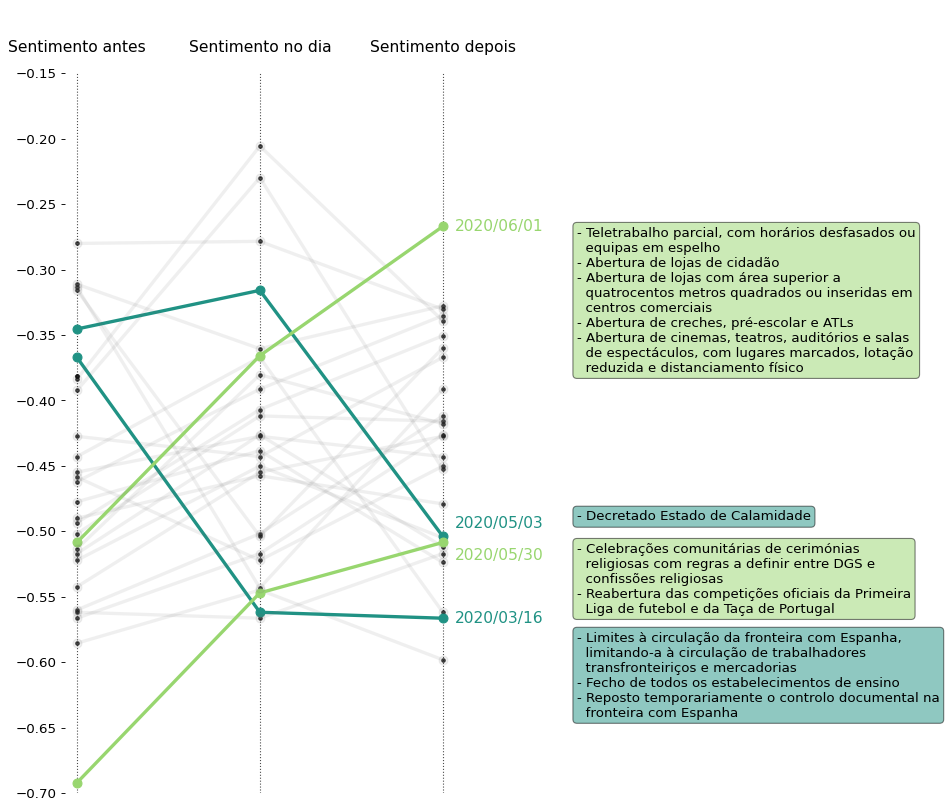

In [197]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15]

axis_left_pos = 1
axis_right_pos = 4
axis_middle_pos = np.mean([axis_left_pos, axis_right_pos])

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p12, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p12[0], p2[0]], 
                      [p1[-1], p12[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(12,13), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_middle_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['middle_sentiment'],
           x=np.repeat(axis_middle_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'], df['middle_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]])
            
            medidas_text = [textwrap.wrap('- '+sentence, wrap_len) for sentence in medidas[medidas['data'] == dates_middle[i]]['desc'].values]
            medidas_text = [line for sentence in medidas_text for line in sentence]
            medidas_text = [sentence if sentence.startswith('-') else '  ' + sentence for sentence in medidas_text]
            box_text = '\n'.join(medidas_text)
            
            if(p[1]-p[0] > 0):
                if(dates_middle[i] == '2020/05/30'):
                    ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1], box_text, fontsize=12, verticalalignment='top', bbox=props, wrap=True)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
            else:
                if(dates_middle[i] == '2020/05/03'):
                    ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]+0.01, box_text,fontsize=12, verticalalignment='bottom', bbox=props)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.13, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':14})
ax.text(axis_middle_pos, -0.13, 'Sentimento no dia', horizontalalignment='center', verticalalignment='center', fontdict={'size':14})
ax.text(axis_right_pos, -0.13, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':14})

# Decoration
ax.set(xlim=(0.9, 7), ylim=(-0.7, -0.1))
ax.set_xticks([])
plt.yticks(y_ticks, fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

In [201]:
df_temp = group_df(noticias, 'data', 'D', 'weighted_classification', 'mean')

In [215]:
medidas.tail(15)

,data,local,tipo,desc
105,2020-06-23,AML,Medidas,Proibida a venda de bebidas alcoólicas nas áre...
106,2020-06-23,AML,Medidas,Proibido o consumo de bebidas alcoólicas ao ar...
107,2020-07-01,Portugal,Alerta,Decretada situação de Alerta em todo o país ex...
108,2020-07-01,AML,Contigência,Situação de Contigência na AML excepto em 19 f...
109,2020-07-01,AML,Calamidade,Situação de Calamidade em todas as freguesias ...
110,2020-07-01,AML,Calamidade,Situação de Calamidade em todas as freguesias ...
111,2020-07-01,AML,Calamidade,Situação de Calamidade em seis das onze fregue...
112,2020-07-01,AML,Calamidade,Situação de Calamidade em duas das dez fregues...
113,2020-07-01,AML,Calamidade,Situação de Calamidade numa das vinte e quatro...
114,2020-07-01,Portugal,Medidas,Limite de ajuntamentos até 20 pessoas


In [220]:
medidas = medidas.iloc[:107,:]

In [221]:
def get_sentiment_changes(df_data, df_events, df_data_key, df_events_key, clf_name):
    events_dates = get_unique_dates(df_events, df_events_key)
    data_dates = get_unique_dates(df_data, df_data_key)
    ans_dict = dict()
    for date in events_dates:
        before_idx, after_idx = get_adjacent_dates_idx(data_dates, date)
        before_date = data_dates[before_idx]
        after_date = data_dates[after_idx]
        sentiment_before = df_data[data_dates == before_date][clf_name].values[0]
        sentiment_after = df_data[data_dates == after_date][clf_name].values[0]
        if date in data_dates:
            sentiment_middle = df_data[data_dates == date][clf_name].values
        else:
            sentiment_middle = [np.nan]
        ans_dict[date] = {'before_date': before_date,
                          'before_sentiment': sentiment_before,
                          'middle_date': date,
                          'middle_sentiment': sentiment_middle[0],
                          'after_date': after_date,
                          'after_sentiment': sentiment_after}
    return ans_dict

In [222]:
change_dict = get_sentiment_changes(df_temp, medidas, 'data', 'data', 'weighted_classification')

In [223]:
df = pd.DataFrame.from_dict(change_dict, orient='index')

In [224]:
df['before_date'] = pd.to_datetime(df['before_date'], errors= "coerce").dt.tz_localize(None)

In [225]:
df['change'] = df.after_sentiment - df.before_sentiment

In [240]:
print(df.before_sentiment.min())
print(df.before_sentiment.max())
print(df.after_sentiment.min())
print(df.after_sentiment.max())


-0.6249617184533013
-0.21046659750724905
-0.6040999994558447
-0.2596718419272945


In [230]:
y_ticks = list(np.arange(-0.65, 0.40, (0.40-(-0.65))/9))

In [231]:
# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)

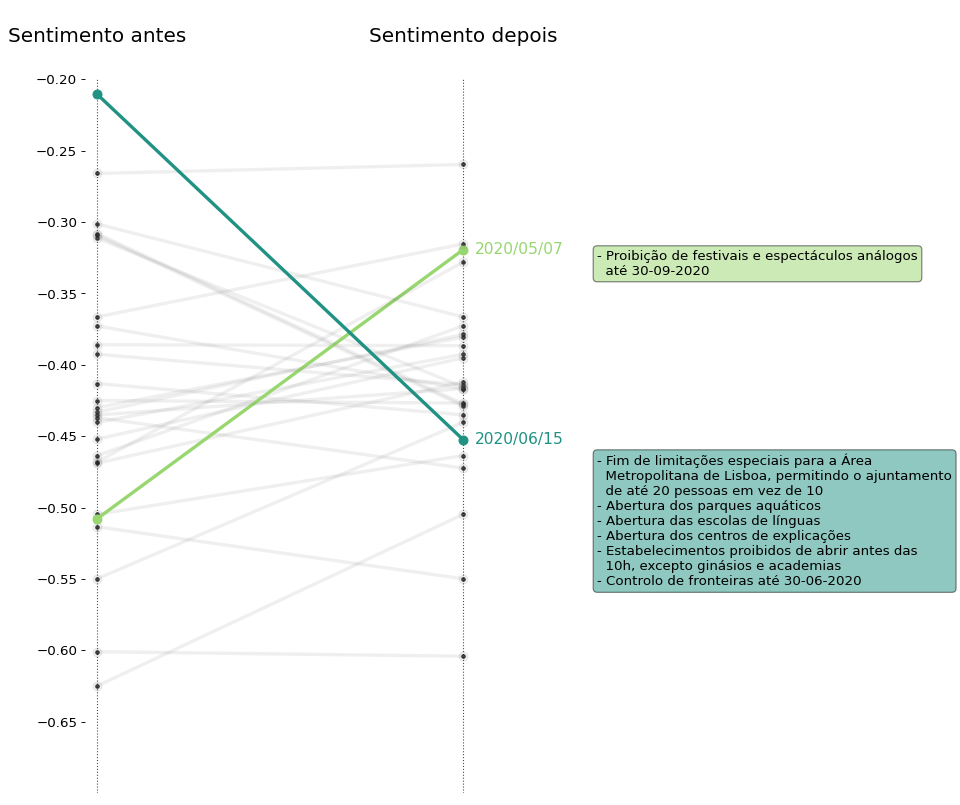

In [268]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2]

axis_left_pos = 1
axis_right_pos = 4

wrap_len = 50

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p2[0]], 
                      [p1[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(12,13), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.2, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.2, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'])):
    if(abs(p[1]-p[0]) > 0.15):
        newline([axis_left_pos, p[0]], [axis_right_pos, p[1]])
            
        medidas_text = [textwrap.wrap('- '+sentence, wrap_len) for sentence in medidas[medidas['data'] == dates_middle[i]]['desc'].values]
        medidas_text = [line for sentence in medidas_text for line in sentence]
        medidas_text = [sentence if sentence.startswith('-') else '  ' + sentence for sentence in medidas_text]
        box_text = '\n'.join(medidas_text)
            
        if(p[1]-p[0] > 0):
            if(dates_middle[i] == '2020/05/30'):
                ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1]-0.01, box_text, fontsize=12, verticalalignment='top', bbox=props, wrap=True)
            else:
                ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                
                props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            if(dates_middle[i] == '2020/05/03'):
                ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                
                props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1]+0.01, box_text,fontsize=12, verticalalignment='bottom', bbox=props)
            else:
                ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                
                props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
    else:
        newline([axis_left_pos, p[0]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.17, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})
ax.text(axis_right_pos, -0.17, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})

# Decoration
ax.set(xlim=(0.9, 7), ylim=(-0.7, -0.15))
ax.set_xticks([])
plt.yticks(y_ticks, fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

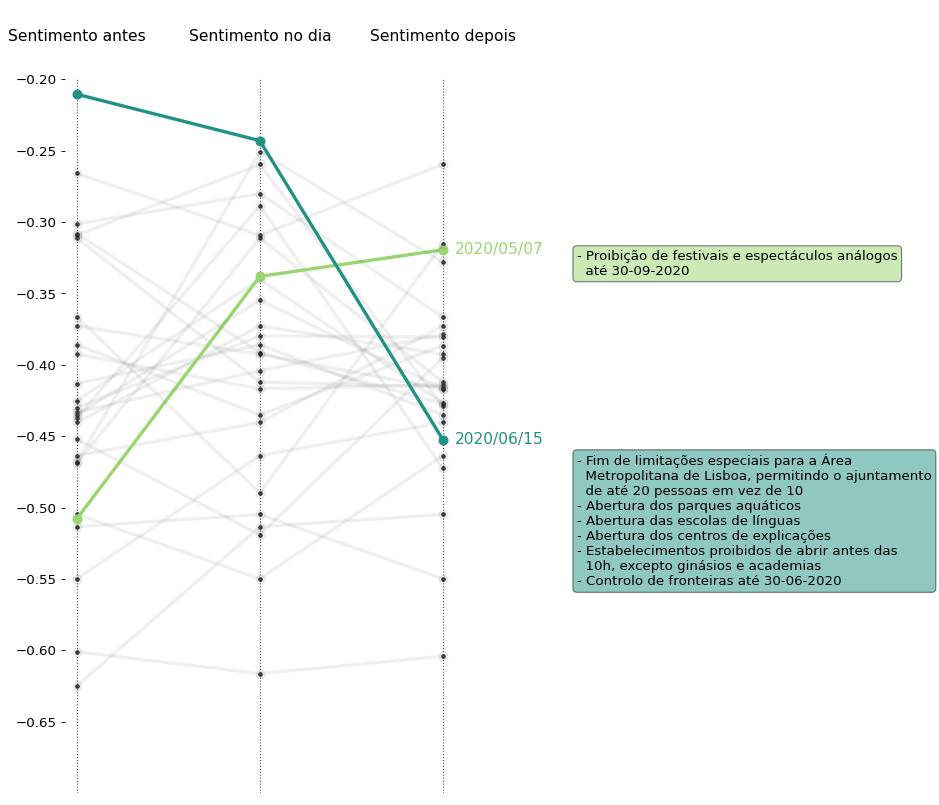

In [269]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2]

axis_left_pos = 1
axis_right_pos = 4
axis_middle_pos = np.mean([axis_left_pos, axis_right_pos])

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p12, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p12[0], p2[0]], 
                      [p1[-1], p12[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(12,13), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.2, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_middle_pos, ymin=-0.7, ymax=-0.2, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.2, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['middle_sentiment'],
           x=np.repeat(axis_middle_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'], df['middle_sentiment'])):
    if(abs(p[1]-p[0]) > 0.15):
        newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]])
        
        medidas_text = [textwrap.wrap('- '+sentence, wrap_len) for sentence in medidas[medidas['data'] == dates_middle[i]]['desc'].values]
        medidas_text = [line for sentence in medidas_text for line in sentence]
        medidas_text = [sentence if sentence.startswith('-') else '  ' + sentence for sentence in medidas_text]
        box_text = '\n'.join(medidas_text)
        
        if(p[1]-p[0] > 0):
            if(dates_middle[i] == '2020/05/30'):
                ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                
                props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1], box_text, fontsize=12, verticalalignment='top', bbox=props, wrap=True)
            else:
                ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                
                props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            if(dates_middle[i] == '2020/05/03'):
                ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                
                props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1]+0.01, box_text,fontsize=12, verticalalignment='bottom', bbox=props)
            else:
                ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                
                props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
    else:
        newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.17, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':14})
ax.text(axis_middle_pos, -0.17, 'Sentimento no dia', horizontalalignment='center', verticalalignment='center', fontdict={'size':14})
ax.text(axis_right_pos, -0.17, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':14})

# Decoration
ax.set(xlim=(0.9, 7), ylim=(-0.7, -0.15))
ax.set_xticks([])
plt.yticks(y_ticks, fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()